# Validating landsat surface temp bands

In [2]:
import pystac_client
import planetary_computer
import odc.stac
from pystac.extensions.eo import EOExtension as eo

In [3]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace
)

#opening a connection to the STAC API endpoint hosted by the Planetary Computer platform
#check website for more info


In [4]:
import pandas as pd
landsat = catalog.get_collection("landsat-c2-l2")

pd.DataFrame(landsat.summaries.get_list("eo:bands"))

,name,common_name,description,center_wavelength,full_width_half_max
0,TM_B1,blue,Visible blue (Thematic Mapper),0.49,0.07
1,TM_B2,green,Visible green (Thematic Mapper),0.56,0.08
2,TM_B3,red,Visible red (Thematic Mapper),0.66,0.06
3,TM_B4,nir08,Near infrared (Thematic Mapper),0.83,0.14
4,TM_B5,swir16,Short-wave infrared (Thematic Mapper),1.65,0.20
5,TM_B6,lwir,Long-wave infrared (Thematic Mapper),11.45,2.10
6,TM_B7,swir22,Short-wave infrared (Thematic Mapper),2.22,0.27
7,ETM_B1,blue,Visible blue (Enhanced Thematic Mapper Plus),0.48,0.07
8,ETM_B2,green,Visible green (Enhanced Thematic Mapper Plus),0.56,0.08
9,ETM_B3,red,Visible red (Enhanced Thematic Mapper Plus),0.66,0.06


In [6]:
pd.DataFrame.from_dict(landsat.extra_fields["item_assets"], orient="index")[
    ["title", "description", "gsd"]
]

,title,description,gsd
qa,Surface Temperature Quality Assessment Band,Collection 2 Level-2 Quality Assessment Band (...,NaN
ang,Angle Coefficients File,Collection 2 Level-1 Angle Coefficients File,NaN
red,Red Band,NaN,NaN
blue,Blue Band,NaN,NaN
drad,Downwelled Radiance Band,Collection 2 Level-2 Downwelled Radiance Band ...,NaN
emis,Emissivity Band,Collection 2 Level-2 Emissivity Band (ST_EMIS)...,NaN
emsd,Emissivity Standard Deviation Band,Collection 2 Level-2 Emissivity Standard Devia...,NaN
lwir,Surface Temperature Band,Collection 2 Level-2 Thermal Infrared Band (ST...,NaN
trad,Thermal Radiance Band,Collection 2 Level-2 Thermal Radiance Band (ST...,NaN
urad,Upwelled Radiance Band,Collection 2 Level-2 Upwelled Radiance Band (S...,NaN


In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import geopandas as gpd

/home/caprice/micromamba/envs/summerfog/lib/python3.12/site-packages/numpy/_core/getlimits.py:552: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


files = sorted(glob.glob("*.nc"))
files

In [ ]:
#Summer Image Info

# Summer2024 - 12 images
# fn1 = 'summer2024/2024-06-30T19:00:35.709157000.nc'
# fn2 = 'summer2024/2024-07-08T19:00:48.578704000.nc'
# fn3 = 'summer2024/2024-07-16T19:00:52.980989000.nc'
# fn4 = 'summer2024/2024-07-24T19:01:02.974514000.nc'
# fn5 = 'summer2024/2024-08-01T19:00:55.969839000.nc'
# fn6 = 'summer2024/2024-08-09T19:01:01.003032000.nc'
# fn7 = 'summer2024/2024-08-17T19:01:04.812884000.nc'
# fn8 = 'summer2024/2024-08-25T19:01:11.381238000.nc'
# fn9 = 'summer2024/2024-09-02T19:01:10.309839000.nc'
# fn10 = 'summer2024/2024-09-10T19:01:19.035063000.nc'
# fn11 = 'summer2024/2024-09-18T19:01:14.981063000.nc'
# fn12 = 'summer2024/2024-09-26T19:01:17.202456000.nc'

# Summer 2023 - 11 images

# fn1 = 'summer2023/2023-07-06T19:01:06.175473000.nc'
# fn2 = 'summer2023/2023-07-14T19:01:02.245247000.nc'
# fn3 = 'summer2023/2023-07-22T19:01:09.918465000.nc'
# fn4 = 'summer2023/2023-07-30T19:01:06.983223000.nc'
# fn5 = 'summer2023/2023-08-07T19:01:17.596833000.nc'
# fn6 = 'summer2023/2023-08-15T19:01:12.237486000.nc'
# fn7 = 'summer2023/2023-08-23T19:01:25.576215000.nc'
# fn8 = 'summer2023/2023-08-31T19:01:22.705534000.nc'
# fn9 = 'summer2023/2023-09-08T19:01:25.437238000.nc'
# fn10 = 'summer2023/2023-09-16T19:01:30.970656000.nc'
# fn11 = 'summer2023/2023-09-24T19:01:31.542221000.nc'


# Summer 2022 - 8 images

# fn1 = 'summer2022/2022-07-11T19:01:15.103030000.nc'
# fn2 = 'summer2022/2022-07-27T19:01:26.703735000.nc'
# fn3 = 'summer2022/2022-08-12T19:01:36.957727000.nc'
# fn4 = 'summer2022/2022-08-28T19:01:40.251593000.nc'
# fn5 = 'summer2022/2022-09-13T19:01:42.617264000.nc'
# fn6 = 'summer2022/2022-09-21T19:02:05.090989000.nc'
# fn7 = 'summer2022/2022-09-29T19:01:47.715049000.nc'
# fn8 = 'summer2022/a2022-08-04T19:01:53.525933000.nc'

# Summer 2021 - 6 images

# fn1 = 'summer2021/2021-06-30T19:01:19.764388000.nc'
# fn2 = 'summer2021/2021-07-16T19:01:21.216804000.nc'
# fn3 = 'summer2021/2021-08-01T19:01:29.757180000.nc'
# fn4 = 'summer2021/2021-08-17T19:01:35.556893000.nc'
# fn5 = 'summer2021/2021-09-02T19:01:40.219193000.nc'
# fn6 = 'summer2021/2021-09-18T19:01:43.611501000.nc'


# Summer 2020 

# fn1 = 'summer2020/2020-07-13T19:01:17.887145000.nc'
# fn2 = 'summer2020/2020-07-29T19:01:22.439132000.nc'
# fn3 = 'summer2020/2020-08-14T19:01:26.426532000.nc'
# fn4 = 'summer2020/2020-08-30T19:01:34.768005000.nc'
# fn5 = 'summer2020/2020-09-15T19:01:40.966120000.nc'
# fn6 = 'summer2020/2020-10-01T19:01:44.969542000.nc'

In [2]:
#format is 'fn = '/mnt/c/Users/isabe/FILES/Documents/FHL Summer 2025/landsat .nc files/2022-09-29T19_01_47.715049000.nc''
fn = '/mnt/c/Users/isabe/FILES/Documents/FHL Summer 2025/landsat .nc files/2022-09-29T19_01_47.715049000.nc'

print('6.26 :0')

fn1 = 'summer2023/2023-07-06T19:01:06.175473000.nc'
fn2 = 'summer2023/2023-07-14T19:01:02.245247000.nc'
fn3 = 'summer2023/2023-07-22T19:01:09.918465000.nc'
fn4 = 'summer2023/2023-07-30T19:01:06.983223000.nc'
fn5 = 'summer2023/2023-08-07T19:01:17.596833000.nc'
fn6 = 'summer2023/2023-08-15T19:01:12.237486000.nc'





# fn1 = 'summer2022/2022-07-11T19:01:15.103030000.nc'
# fn2 = 'summer2022/2022-07-27T19:01:26.703735000.nc'
# fn3 = 'summer2022/2022-08-12T19:01:36.957727000.nc'
# fn4 = 'summer2022/2022-08-28T19:01:40.251593000.nc'
# fn5 = 'summer2022/2022-09-13T19:01:42.617264000.nc'
# fn6 = 'summer2022/2022-09-21T19:02:05.090989000.nc'
# fn7 = 'summer2022/2022-09-29T19:01:47.715049000.nc'
# fn8 = 'summer2022/a2022-08-04T19:01:53.525933000.nc'



6.26 :0


In [3]:
#filesnames = [fn1, fn2, fn3, fn4, fn5, fn6, fn7, fn8, fn9, fn10, fn11, fn12, fn13, fn14, fn15, fn16]
#filenames = [fn1, fn2, fn3, fn4, fn5, fn6, fn7, fn8, fn9, fn10, fn11]
filenames = [fn1, fn2, fn3, fn4, fn5, fn6]
#, fn7, fn8, fn9, fn10, fn11, fn12]
             #, fn6, fn7, fn8, fn9, fn10]
             #, fn9, fn10, fn11]
#fn12]


datasets = [xr.open_dataset(fn) for fn in filenames]
ds1 = xr.open_dataset(fn1)
ds2 = xr.open_dataset(fn2)
ds3 = xr.open_dataset(fn3)
ds4 = xr.open_dataset(fn4)
ds5 = xr.open_dataset(fn5)
ds6 = xr.open_dataset(fn6)
# ds7 = xr.open_dataset(fn7)
# ds8 = xr.open_dataset(fn8)
# ds9 = xr.open_dataset(fn9)
# ds10= xr.open_dataset(fn10)
# ds11= xr.open_dataset(fn11)
# ds12= xr.open_dataset(fn12)
# # ds13= xr.open_dataset(fn13)
# ds14= xr.open_dataset(fn14)
# # ds15= xr.open_dataset(fn15)
# # ds16= xr.open_dataset(fn16)

In [4]:
ds5


<xarray.Dataset> Size: 149MB
Dimensions:           (y: 1974, x: 1675)
Coordinates:
  * y                 (y) float64 16kB 5.42e+06 5.42e+06 ... 5.361e+06 5.361e+06
  * x                 (x) float64 13kB 4.75e+05 4.751e+05 ... 5.253e+05
    time              datetime64[ns] 8B ...
Data variables: (12/21)
    spatial_ref       int32 4B ...
    qa                (y, x) int16 7MB ...
    red               (y, x) uint16 7MB ...
    blue              (y, x) uint16 7MB ...
    drad              (y, x) int16 7MB ...
    emis              (y, x) int16 7MB ...
    ...                ...
    swir22            (y, x) uint16 7MB ...
    coastal           (y, x) uint16 7MB ...
    qa_pixel          (y, x) uint16 7MB ...
    qa_radsat         (y, x) uint16 7MB ...
    qa_aerosol        (y, x) uint8 3MB ...
    temperature_degC  (y, x) float64 26MB ...

ds

In [5]:
#1 plot

#dss = [ds1, ds2, ds3, ds4, ds5, ds6, ds7, ds8, ds9, ds10, ds11, ds12, ds13, ds14, ds15, ds16]
dss = [ds1, ds2, ds3, ds4, ds5, ds6]
       #, ds6, ds7, ds8, ds9, ds10]



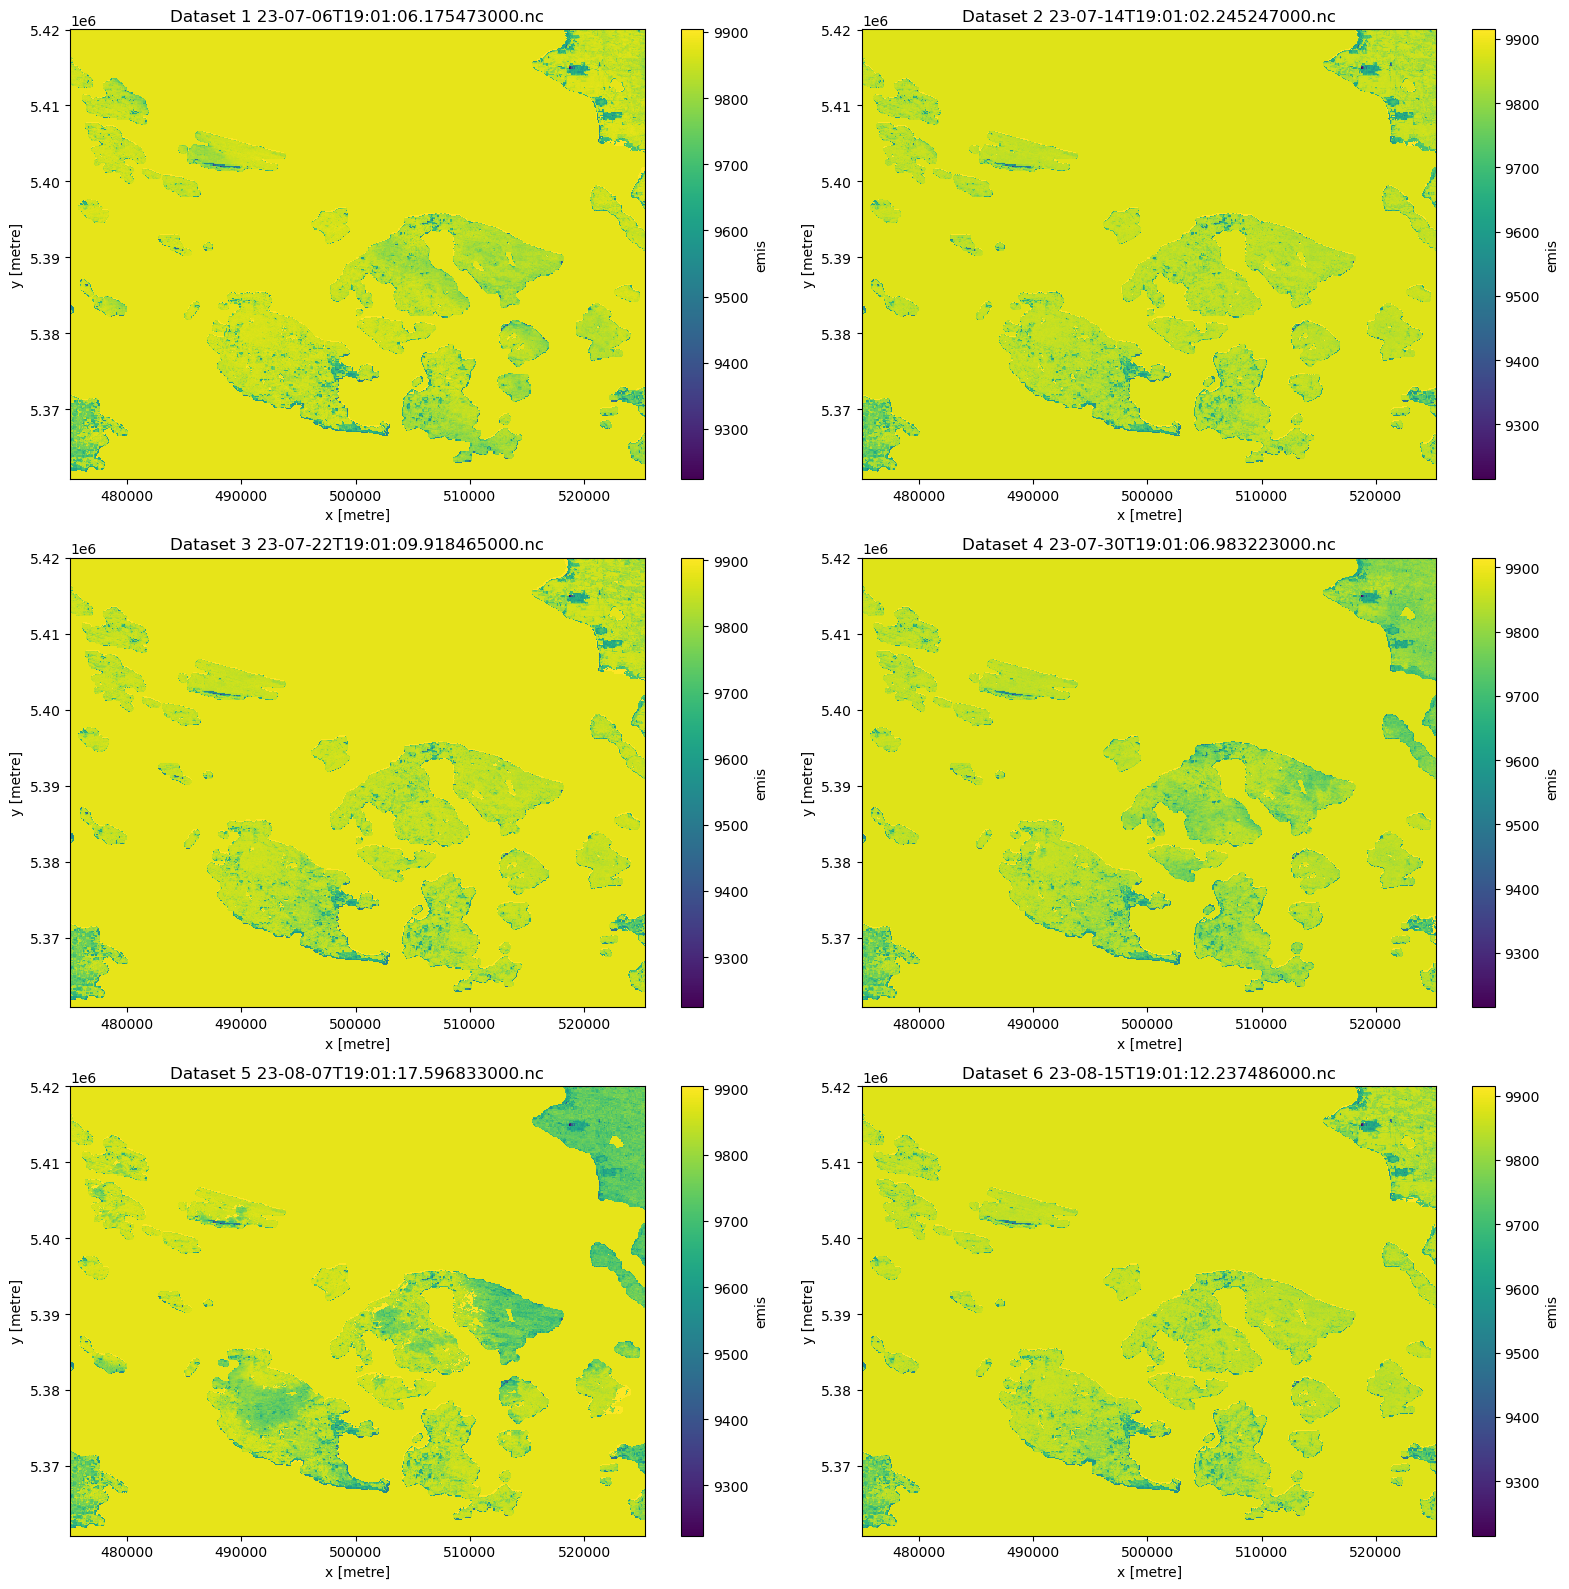

In [ ]:
#all plots

fig, axes = plt.subplots(3, 2, figsize=(16, 16))  #edit args to fit # of plots needed
axes = axes.flatten() 


for i, d in enumerate(dss):
    
    d['emis'].plot(ax=axes[i])  # Specify subplot
    axes[i].set_title(f"Dataset {i+1} " + d.encoding['source'][45:])     # Optional title

plt.tight_layout()
plt.show()